Desafio 40: Produção Agrícola por Região

📂 Dataset: Produção de diferentes culturas em diversas regiões brasileiras entre 2021 e 2023.
Colunas: ID, Ano, Região, Cultura, Produção_Toneladas, Área_Hectares

🎯 Tarefas:

Padronize os nomes das culturas (ex: "soja").

Trate o valor ausente em Área_Hectares.

Qual foi a média de produtividade (toneladas/hectare) por cultura?

Qual região teve a maior produção total em 2023?

Crie um gráfico de barras exibindo a produção total de cada cultura por ano.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("dia_40_producao_agricola.csv")
df.head()

,ID,Ano,Região,Cultura,Produção_Toneladas,Área_Hectares
0,AG0001,2021,Norte,Trigo,14523.71,214.1
1,AG0002,2022,Sudeste,Feijão,9714.85,264.1
2,AG0003,2023,Norte,Feijão,7430.69,209.4
3,AG0004,2022,Nordeste,Feijão,7816.91,205.5
4,AG0005,2021,Sul,Trigo,5585.55,212.2


In [23]:
#Padronize os nomes das culturas (ex: "soja").
df["Cultura"] = df["Cultura"].str.title()
df["Cultura"].unique()

array(['Trigo', 'Feijão', 'Milho', 'Soja', 'Arroz'], dtype=object)

In [24]:
#Trate o valor ausente em Área_Hectares.
df["Área_Hectares"] = df["Área_Hectares"].fillna(
    df.groupby(["Cultura", "Região"])["Área_Hectares"].transform("mean")
).round(2)
df["Área_Hectares"][190]

241.9

In [25]:
#Qual foi a média de produtividade (toneladas/hectare) por cultura?
df["Produtividade_ton_ha"] = df["Produção_Toneladas"] / df["Área_Hectares"]
mediaProdutividadeCultura = df.groupby("Cultura")["Produtividade_ton_ha"].mean().reset_index().round(2)
print(mediaProdutividadeCultura)

  Cultura  Produtividade_ton_ha
0   Arroz                 41.29
1  Feijão                 42.39
2   Milho                 42.08
3    Soja                 40.10
4   Trigo                 40.24


In [26]:
#Qual região teve a maior produção total em 2023?
df["Ano"] = pd.to_numeric(df["Ano"], errors="coerce")
ano2023 = df[df["Ano"] == 2023]

producaoRegiao2023 = ano2023.groupby("Região")["Produção_Toneladas"].sum().sort_values(ascending=False)
print(f"Região com maior produção em 2023: {producaoRegiao2023.idxmax()}")

Região com maior produção em 2023: Norte


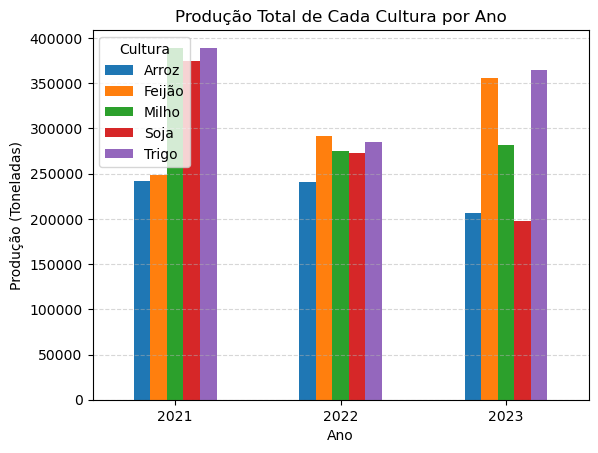

In [35]:
#Crie um gráfico de barras exibindo a produção total de cada cultura por ano.
producaoCulturaAno = df.groupby(["Ano", "Cultura"])["Produção_Toneladas"].sum().unstack()

producaoCulturaAno.plot(kind='bar')
plt.title("Produção Total de Cada Cultura por Ano")
plt.xlabel("Ano")
plt.ylabel("Produção (Toneladas)")
plt.xticks(rotation=0)
plt.legend(title="Cultura")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()